# EXPLORATORY DATA ANALYSIS
Company X is expanding in to new industries to diversify its portfolio. They are particularly interested in purchasing and operating airplanes for commercial and private enterprises. However, they do not have enough knowledge on the potential risks of aircrafts.



**Objective**

- Determine which aircraft are the lowest risk for the company X to start this new endeavor.
- Translate findings into actionable insights that the stake holders can use to help decide which aircraft to purchase.


## The Data
The data is from the National Transportation Safety Board that includes aviation accident data from 1962 to 2023 about civil aviation accidents and selected incidents in the United States and international waters. The dataset was obtained from [Kaggle](https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses).


## Loading the Data¶

In [1]:
# import necessary libraries
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_excel("AviationData.xlsx")
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaT
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,1996-09-19
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,2007-02-26
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,2000-09-12
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,1980-04-16


## Exploring the Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                88889 non-null  object        
 1   Investigation.Type      88889 non-null  object        
 2   Accident.Number         88889 non-null  object        
 3   Event.Date              88889 non-null  datetime64[ns]
 4   Location                88837 non-null  object        
 5   Country                 88663 non-null  object        
 6   Latitude                34382 non-null  object        
 7   Longitude               34373 non-null  object        
 8   Airport.Code            50132 non-null  object        
 9   Airport.Name            52704 non-null  object        
 10  Injury.Severity         87889 non-null  object        
 11  Aircraft.damage         85695 non-null  object        
 12  Aircraft.Category       32287 non-null  object

In [4]:
# get the number of missing values
df.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
dtype: i

## Data Cleaning
1. Getting relevant columns
2. Renaming columns
3. Handling missing values
4. Removing duplicate values.
   

In [11]:
relevant_columns = [
    'Investigation.Type',
    'Event.Date',
    'Country',
    'Injury.Severity',
    'Aircraft.damage',
    'Make',
    'Model',
    'Number.of.Engines',
    'Engine.Type',
    'Purpose.of.flight',
    'Total.Fatal.Injuries',
    'Total.Serious.Injuries',
    'Total.Minor.Injuries',
    'Total.Uninjured',
    'Weather.Condition',
    
]

In [12]:
df_new = df.loc[:,relevant_columns]
df_new.shape

(88889, 15)

In [13]:
# change some column titles to more managable ones
new_column_names = { 'Investigation.Type': 'Investigation_Type', 'Event.Date':'Event_Date', 'Injury.Severity':'Injury_Severity', 
                    'Aircraft.damage':'Aircraft_damage', 'Number.of.Engines':'Number_of_Engines','Engine.Type':'Engine_Type', 'Purpose.of.flight':'Flight_Purpose',
                    'Total.Fatal.Injuries':'Fatal_Injuries', 'Total.Serious.Injuries':'Serious_Injuries',
                   'Total.Minor.Injuries':'Minor_Injuries', 'Total.Uninjured':'Uninjured', 'Weather.Condition':'Weather',}
df_new.rename(columns=new_column_names, inplace=True)

In [14]:
df_new.head()

,Investigation_Type,Event_Date,Country,Injury_Severity,Aircraft_damage,Make,Model,Number_of_Engines,Engine_Type,Flight_Purpose,Fatal_Injuries,Serious_Injuries,Minor_Injuries,Uninjured,Weather
0,Accident,1948-10-24,United States,Fatal(2),Destroyed,Stinson,108-3,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK
1,Accident,1962-07-19,United States,Fatal(4),Destroyed,Piper,PA24-180,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK
2,Accident,1974-08-30,United States,Fatal(3),Destroyed,Cessna,172M,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC
3,Accident,1977-06-19,United States,Fatal(2),Destroyed,Rockwell,112,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC
4,Accident,1979-08-02,United States,Fatal(1),Destroyed,Cessna,501,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC


In [15]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Investigation_Type  88889 non-null  object        
 1   Event_Date          88889 non-null  datetime64[ns]
 2   Country             88663 non-null  object        
 3   Injury_Severity     87889 non-null  object        
 4   Aircraft_damage     85695 non-null  object        
 5   Make                88826 non-null  object        
 6   Model               88797 non-null  object        
 7   Number_of_Engines   82805 non-null  float64       
 8   Engine_Type         81793 non-null  object        
 9   Flight_Purpose      82697 non-null  object        
 10  Fatal_Injuries      77488 non-null  float64       
 11  Serious_Injuries    76379 non-null  float64       
 12  Minor_Injuries      76956 non-null  float64       
 13  Uninjured           82977 non-null  float64   

In [17]:
df_new['Investigation_Type'].value_counts()

Investigation_Type
Accident    85015
Incident     3874
Name: count, dtype: int64

In [18]:
df_new['Investigation_Type'].isna().sum()

0

### Distribution by Investigation Types

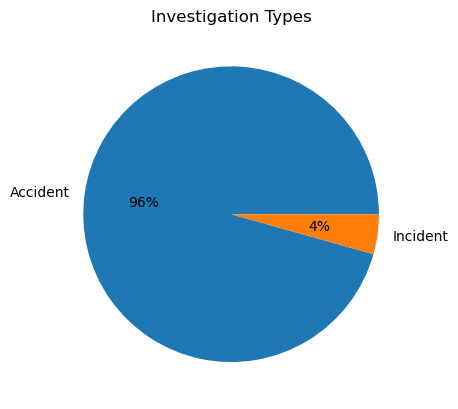

In [31]:
# investigation type pie chart
df_new['Investigation_Type'].value_counts().plot(kind='pie', ylabel='' ,title='Investigation Types', autopct='%1.0f%%');

Accident investigation type leads with 96% 

### Distribution by Make

In [32]:
# I subset the data to determine the Make and Model that has been involved in many Accidents
# Handling the missing data in Make and Model

df_new.Make.value_counts()

Make
Cessna             22227
Piper              12029
CESSNA              4922
Beech               4330
PIPER               2841
                   ...  
Leonard Walters        1
Maule Air Inc.         1
Motley Vans            1
Perlick                1
ROYSE RALPH L          1
Name: count, Length: 8237, dtype: int64

Here, we realize that Cessna and CESSNA are taken as different rows despite being the same thing. change the case to lower

In [33]:
df_new['Make'] = df_new['Make'].str.lower()

In [34]:
df_new['Make'].isna().sum()

67

In [35]:
df_new= df_new[df_new['Make'].notna()]

In [42]:
df_new.Make.value_counts()[:10]

Make
cessna      27149
piper       14870
beech        5372
boeing       2745
bell         2722
mooney       1334
robinson     1230
grumman      1172
bellanca     1045
hughes        932
Name: count, dtype: int64

now the unique values are populated correctly. 

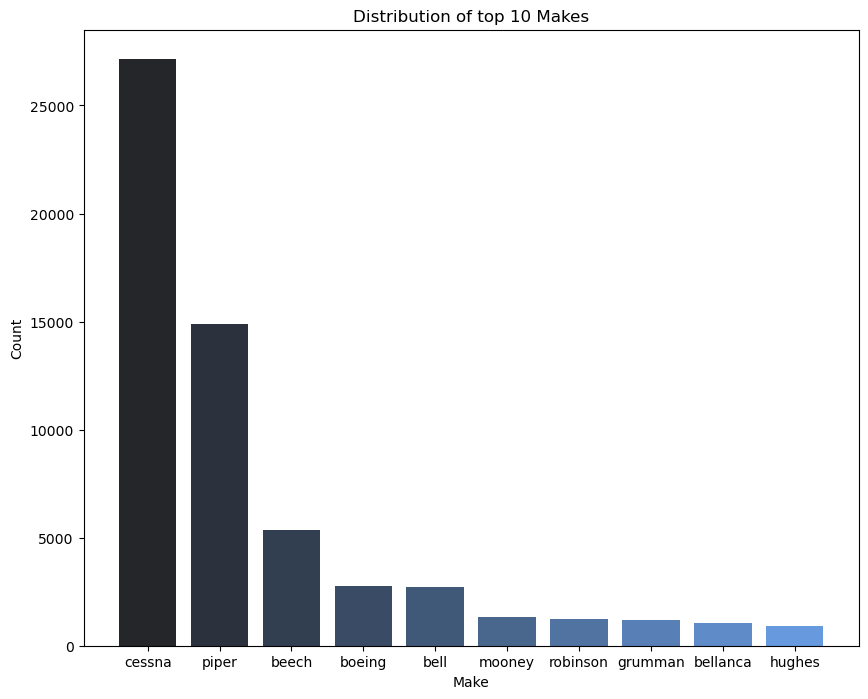

In [66]:
fig, ax = plt.subplots(figsize=(10,8))
colors = sns.dark_palette("#69d", n_colors=len(df_new.Make.value_counts()[:10]), reverse=False)



ax.bar(df_new.Make.value_counts()[:10].index, df_new.Make.value_counts()[:10].values, color = colors)
ax.set_ylabel('Count')
ax.set_xlabel('Make')
ax.set_title('Distribution of top 10 Makes');

In [235]:
# Model
df_new.Model.value_counts()

Model
152             2367
172             1756
172N            1164
PA-28-140        932
150              829
                ... 
747-2R7F           1
GC-1-A             1
737-3S3            1
MBB-BK117-B2       1
M-8 EAGLE          1
Name: count, Length: 12306, dtype: int64

In [236]:
df_new['Model'].isna().sum()

49

In [237]:
# convert to str 
df_new['Model'] = df_new['Model'].astype(str)
df_new['Model'].info()

<class 'pandas.core.series.Series'>
Index: 88822 entries, 0 to 88888
Series name: Model
Non-Null Count  Dtype 
--------------  ----- 
88822 non-null  object
dtypes: object(1)
memory usage: 1.4+ MB


In [238]:
# drop Missing rows
df_new = df_new[~df_new['Model'].isin(['UNKNOWN'])]
df_new = df_new[df_new['Model'].notna()]

## Visualizations

### Lets investigate the make and Model distribution 

In [239]:
# lets groups these two with accident and plot a barchart
make_model = df_new.groupby(['Make', 'Model','Investigation_Type'], sort=False).size().reset_index(name='AccidentCount')
make_model = make_model[make_model['Investigation_Type'] == 'Accident']
make_model

,Make,Model,Investigation_Type,AccidentCount
0,stinson,108-3,Accident,97
1,piper,PA24-180,Accident,4
2,cessna,172M,Accident,793
3,rockwell,112,Accident,9
4,cessna,501,Accident,28
...,...,...,...,...
19352,orlican s r o,M-8 EAGLE,Accident,1
19353,boeing,767-322,Accident,1
19354,airbus helicopters,EC 130 T2,Accident,1
19355,royse ralph l,GLASAIR,Accident,1


In [240]:
make_model = make_model.sort_values(by='AccidentCount', ascending=False)
make_model


,Make,Model,Investigation_Type,AccidentCount
19,cessna,152,Accident,2348
17,cessna,172,Accident,1744
51,cessna,172N,Accident,1160
49,piper,PA-28-140,Accident,929
87,cessna,150,Accident,822
...,...,...,...,...
8252,fronsman,ROTORWAY EXEC,Accident,1
8253,hillam,RANS S-9,Accident,1
8254,morgan,MINI-500,Accident,1
8255,eichman,AEROBAT III,Accident,1


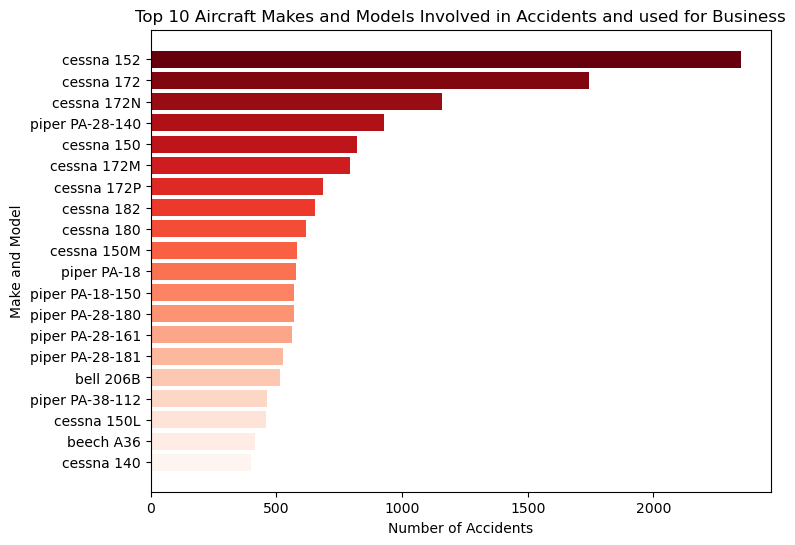

In [244]:
# plotting the top 10 make and model 

fig, ax = plt.subplots(figsize=(8,6))

# Getting a smooth color blend from 'RdYlBu' colormap
colors = plt.cm.Reds(np.linspace(1, 0, len(make_model['Make'][:20])))

ax.barh(make_model['Make'][:20] + ' ' +make_model['Model'][:20], make_model['AccidentCount'][:20], color=colors)
ax.set_xlabel('Number of Accidents')
ax.set_ylabel('Make and Model')
ax.set_title('Top 10 Aircraft Makes and Models Involved in Accidents and used for Business')
ax.invert_yaxis();

Cessna had been involved in many accidents, followed by PIPER.

Cessna Model 152 has most accidents.

### Lets investigate the flight purpose and Make Model that have had many accidents

In [245]:
# Flight purpose cleaning
df_new['Flight_Purpose'].isna().sum()

6147

In [246]:
# Remove null values
df_new = df_new[df_new['Flight_Purpose'].notna()]
df_new = df_new[~df_new['Flight_Purpose'].isin(['Unknown'])]

In [247]:
df_new['Flight_Purpose'].value_counts()

Flight_Purpose
Personal                     49424
Instructional                10601
Aerial Application            4712
Business                      4017
Positioning                   1646
Other Work Use                1264
Ferry                          812
Aerial Observation             794
Public Aircraft                720
Executive/corporate            553
Flight Test                    404
Skydiving                      182
External Load                  123
Public Aircraft - Federal      105
Banner Tow                     101
Air Race show                   99
Public Aircraft - Local         74
Public Aircraft - State         64
Air Race/show                   59
Glider Tow                      53
Firefighting                    40
Air Drop                        11
ASHO                             6
PUBS                             4
PUBL                             1
Name: count, dtype: int64

Unknown will be taken as Missing values

In [248]:
make_model_flight = df_new.groupby(['Make', 'Model','Flight_Purpose']).size().reset_index(name='Count')
make_model_flight.head()


,Make,Model,Flight_Purpose,Count
0,107.5 flying corporation,One Design DR 107,Personal,1
1,177mf llc,PITTS MODEL 12,Personal,1
2,1977 colfer-chan,STEEN SKYBOLT,Personal,1
3,1st ftr gp,FOCKE-WULF 190,Personal,1
4,2000 mccoy,Genesis,Flight Test,1


In [249]:
# Create a column combining Make and Model
make_model_flight['Make_Model'] = make_model_flight['Make'] + ' ' + make_model_flight['Model']

In [250]:
# Pivot the data for plotting
make_model_flight_pivot = make_model_flight.pivot(index='Make_Model', columns='Flight_Purpose', values='Count').fillna(0)

# Calculate total count for each flight purpose
count_flight_purpose = make_model_flight_pivot.sum(axis=0)

# Select top 10 flight purposes
top_flight_purposes = count_flight_purpose.nlargest(5).index


# Filter the pivoted data to only include the top 10 flight purposes
make_model_flight_pivot_top = make_model_flight_pivot[top_flight_purposes]

# Sorting by the total count
make_model_flight_pivot_top['Total'] = make_model_flight_pivot_top.sum(axis=1)

# sort values by total 
make_model_flight_pivot_top = make_model_flight_pivot_top.sort_values(by='Total', ascending=False).drop(columns='Total')


C:\Users\ericm\AppData\Local\Temp\ipykernel_144\3857079314.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  make_model_flight_pivot_top['Total'] = make_model_flight_pivot_top.sum(axis=1)


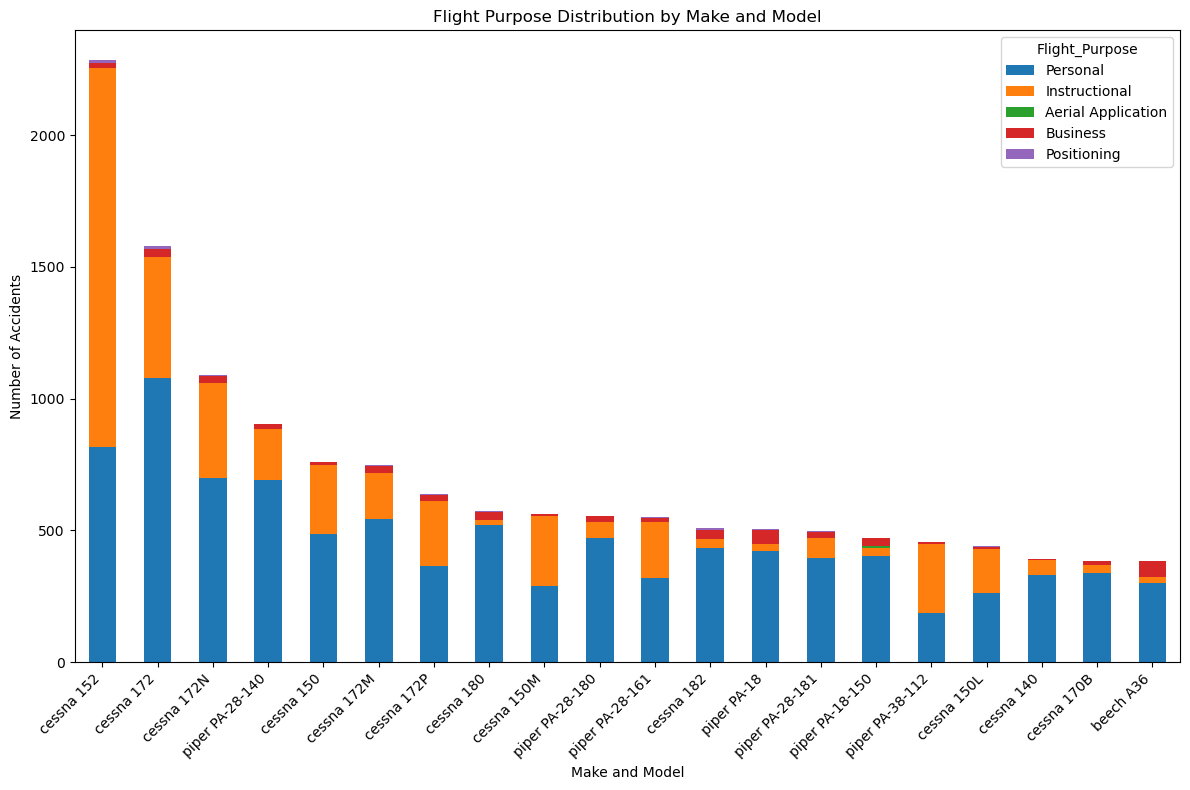

In [140]:

# Plotting and stacking the flightpurpose categories in a bar chart
fig, ax = plt.subplots(figsize=(12, 8))


make_model_flight_pivot_top[:20].plot(kind='bar', stacked=True, ax=ax, )

ax.set_xlabel('Make and Model')
ax.set_ylabel('Number of Accidents')
ax.set_title('Flight Purpose Distribution by Make and Model')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()

plt.show()

From the distribution, the CESSNA and PIPER that have been involved in most accidents while  Personal and Instructional use lead the flight purpose. 




#### lets group make and flight since make_model is not showing the several makes types

In [251]:
# group make and flight since make_model is not showing th several makes types
make_flight = df_new.groupby(['Make','Flight_Purpose', 'Investigation_Type']).size().reset_index(name='Count')

# filter make flight group to get top 5 flight purpose only
make_flight = make_flight[make_flight['Flight_Purpose'].isin(['Business', 'Executive/corporate'])]

# filter to show only Accidents
make_flight = make_flight[make_flight['Investigation_Type'] == 'Accident']

# sort values by count
make_flight = make_flight.sort_values(by='Count', ascending=False)
make_flight

,Make,Flight_Purpose,Investigation_Type,Count
1655,cessna,Business,Accident,1329
6435,piper,Business,Accident,798
867,beech,Business,Accident,470
912,bell,Business,Accident,168
1657,cessna,Executive/corporate,Accident,145
...,...,...,...,...
3129,flight design gmbh,Business,Accident,1
3170,folland,Business,Accident,1
3177,forbes,Business,Accident,1
3274,fuji,Business,Accident,1


In [252]:
# Pivot the data for plotting
make_flight_pivot = make_flight.pivot(index='Make', columns='Flight_Purpose', values='Count').fillna(0)

# create count to bt able to sort by Count
make_flight_pivot['Count'] = make_flight_pivot.sum(axis=1)

#sort values by count
make_flight_pivot = make_flight_pivot.sort_values(by='Count',ascending=False).drop(columns='Count')
make_flight_pivot[:6]

Flight_Purpose,Business,Executive/corporate
Make,,
cessna,1329.0,145.0
piper,798.0,61.0
beech,470.0,70.0
bell,168.0,33.0
mooney,95.0,2.0
hughes,80.0,4.0


In [253]:
make_flight_pivot = make_flight_pivot['Business'] + make_flight_pivot['Executive/corporate']
make_flight_pivot

Make
cessna        1474.0
piper          859.0
beech          540.0
bell           201.0
mooney          97.0
               ...  
forbes           1.0
fuji             1.0
g-dawg llc       1.0
galaxy           1.0
yuneec           1.0
Length: 276, dtype: float64

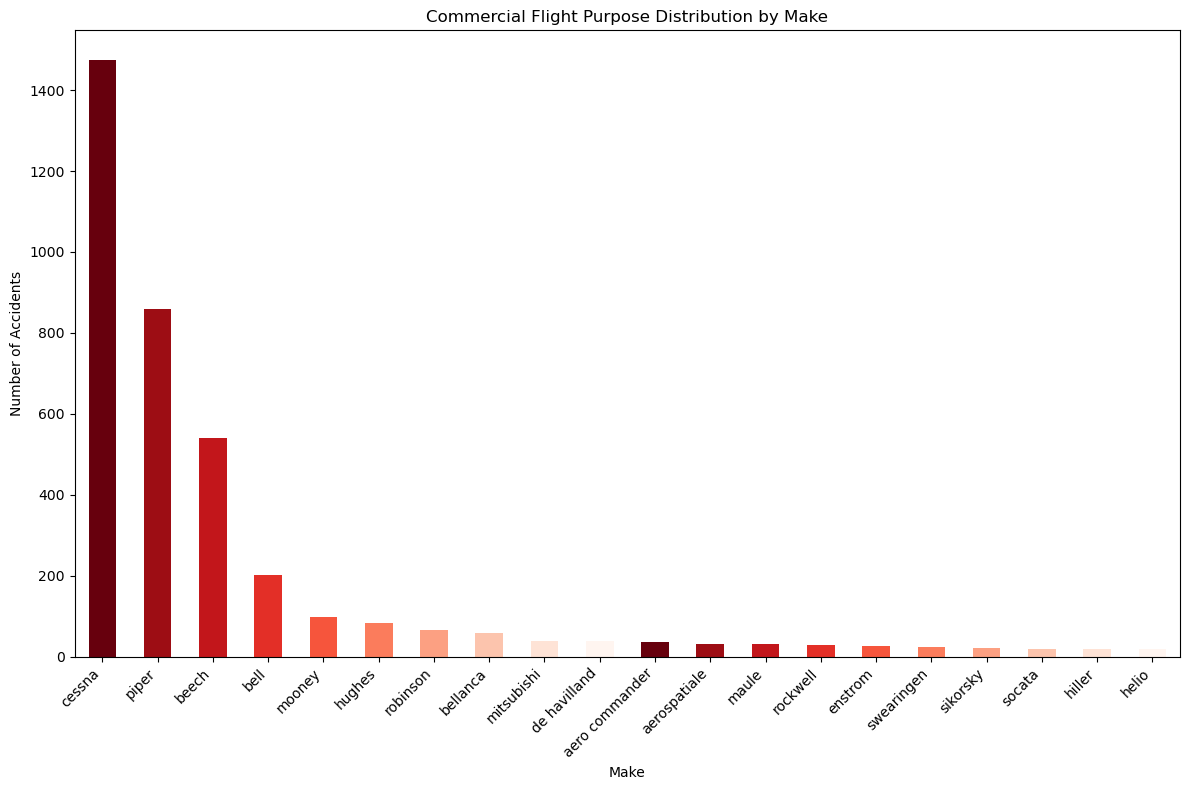

In [255]:

# Plotting and stacking the flightpurpose categories in a bar chart
fig, ax = plt.subplots(figsize=(12, 8))

# Getting a smooth color blend from 'RdYlBu' colormap
colors = plt.cm.Reds(np.linspace(1, 0, len(make_flight_pivot.index[:10])))

make_flight_pivot[:20].plot(kind='bar', stacked=True, ax=ax, color=colors)

ax.set_xlabel('Make')
ax.set_ylabel('Number of Accidents')
ax.set_title('Commercial Flight Purpose Distribution by Make')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()

plt.show()

cessna, piper,beech,bell, mooney have the most accidents used for commercial purposes.

The Make and Model alone hardly gives us the make and model at lowest risk. 
To determine this other factors come into play

### Lets investigate the aircraft damage and the make and model of the planes

In [256]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75869 entries, 0 to 88888
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Investigation_Type  75869 non-null  object        
 1   Event_Date          75869 non-null  datetime64[ns]
 2   Country             75750 non-null  object        
 3   Injury_Severity     75834 non-null  object        
 4   Aircraft_damage     75124 non-null  object        
 5   Make                75869 non-null  object        
 6   Model               75869 non-null  object        
 7   Amateur.Built       75839 non-null  object        
 8   Number_of_Engines   73419 non-null  float64       
 9   Engine_Type         72419 non-null  object        
 10  Flight_Purpose      75869 non-null  object        
 11  Fatal_Injuries      66022 non-null  float64       
 12  Serious_Injuries    65042 non-null  float64       
 13  Minor_Injuries      65666 non-null  float64       


In [257]:
# check mussing values
df_new['Aircraft_damage'].isna().sum()

745

In [258]:
# drop missing values
df_new = df_new[df_new['Aircraft_damage'].notna()]

In [259]:
df_new['Aircraft_damage'].value_counts()

Aircraft_damage
Substantial    58298
Destroyed      15750
Minor           1025
Unknown           51
Name: count, dtype: int64

Unknown is taken as missing values so i drop the rows since its less than 1% of the data in the column 

In [260]:
df_new = df_new[~df_new['Aircraft_damage'].isin(['Unknown'])]
df_new['Aircraft_damage'].value_counts()

Aircraft_damage
Substantial    58298
Destroyed      15750
Minor           1025
Name: count, dtype: int64

In [261]:
make_model_damage = df_new.groupby(['Make', 'Model', 'Aircraft_damage']).size().reset_index(name='Count')
make_model_damage.head()

,Make,Model,Aircraft_damage,Count
0,107.5 flying corporation,One Design DR 107,Destroyed,1
1,177mf llc,PITTS MODEL 12,Substantial,1
2,1977 colfer-chan,STEEN SKYBOLT,Substantial,1
3,1st ftr gp,FOCKE-WULF 190,Destroyed,1
4,2000 mccoy,Genesis,Destroyed,1


In [262]:
make_model_damage['Make_model'] = make_model_damage['Make']+ ' '+ make_model_damage['Model']
make_model_damage

,Make,Model,Aircraft_damage,Count,Make_model
0,107.5 flying corporation,One Design DR 107,Destroyed,1,107.5 flying corporation One Design DR 107
1,177mf llc,PITTS MODEL 12,Substantial,1,177mf llc PITTS MODEL 12
2,1977 colfer-chan,STEEN SKYBOLT,Substantial,1,1977 colfer-chan STEEN SKYBOLT
3,1st ftr gp,FOCKE-WULF 190,Destroyed,1,1st ftr gp FOCKE-WULF 190
4,2000 mccoy,Genesis,Destroyed,1,2000 mccoy Genesis
...,...,...,...,...,...
18120,zubair s khan,RAVEN,Substantial,1,zubair s khan RAVEN
18121,zuber thomas p,ZUBER SUPER DRIFTER,Substantial,1,zuber thomas p ZUBER SUPER DRIFTER
18122,zukowski,EAA BIPLANE,Substantial,1,zukowski EAA BIPLANE
18123,zwart,KIT FOX VIXEN,Substantial,1,zwart KIT FOX VIXEN


In [263]:
make_model_damage_pivot = make_model_damage.pivot(index='Make_model', columns='Aircraft_damage', values='Count').fillna(0)
make_model_damage_pivot

Aircraft_damage,Destroyed,Minor,Substantial
Make_model,,,
107.5 flying corporation One Design DR 107,1.0,0.0,0.0
177mf llc PITTS MODEL 12,0.0,0.0,1.0
1977 colfer-chan STEEN SKYBOLT,0.0,0.0,1.0
1st ftr gp FOCKE-WULF 190,1.0,0.0,0.0
2000 mccoy Genesis,1.0,0.0,0.0
...,...,...,...
zubair s khan RAVEN,0.0,0.0,1.0
zuber thomas p ZUBER SUPER DRIFTER,0.0,0.0,1.0
zukowski EAA BIPLANE,0.0,0.0,1.0


In [264]:
# create total column to be able to sort values
make_model_damage_pivot['Total'] = make_model_damage_pivot.sum(axis=1)
make_model_damage_pivot = make_model_damage_pivot.sort_values(by='Total', ascending=False).drop(columns='Total')
make_model_damage_pivot

Aircraft_damage,Destroyed,Minor,Substantial
Make_model,,,
cessna 152,352.0,28.0,1935.0
cessna 172,178.0,8.0,1440.0
cessna 172N,225.0,7.0,893.0
piper PA-28-140,218.0,5.0,694.0
cessna 150,123.0,9.0,653.0
...,...,...,...
flurry AVENTURA II,0.0,0.0,1.0
fly baby 1-A,0.0,0.0,1.0
fly by sea co COMP AIR 1,0.0,0.0,1.0


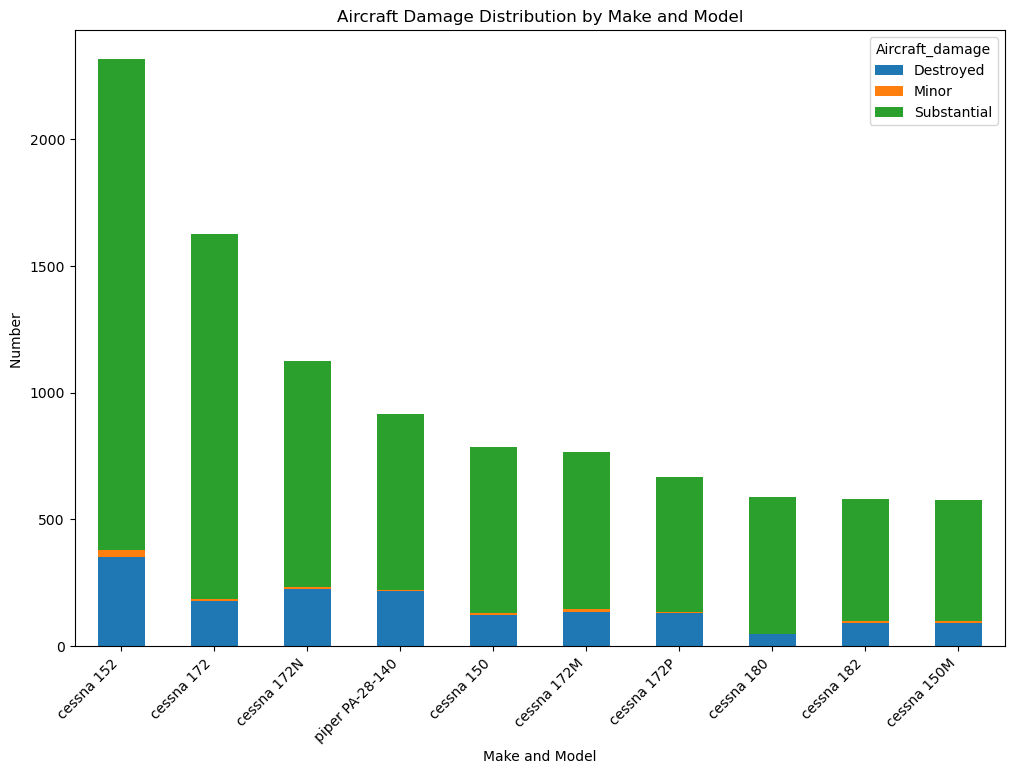

In [265]:
# plotting the pivot table using plot function
fig, ax = plt.subplots(figsize=(12,8))


make_model_damage_pivot[:10].plot(kind='bar',stacked=True, ax=ax,)
ax.set_title('Aircraft Damage Distribution by Make and Model')
ax.set_xlabel('Make and Model')
ax.set_ylabel('Number ')
plt.xticks(rotation=45, ha='right');

The Cessna suffered substantial damage more.

### Lets determine the aircraft make with less accidents and was used for business. 

In [266]:
#group by make and flight purpose
make_business = df_new.groupby(['Make', 'Flight_Purpose']).size().reset_index(name='Count')

# make a pivot table
make_business_pivot = make_business.pivot(index='Make', columns='Flight_Purpose', values='Count').fillna(0)

#get business 
mbusiness = make_business_pivot['Business'].reset_index(name='Count')

# sort values by count
mbsort = mbusiness.sort_values(by='Count', ascending=False)
mbsort

,Make,Count
1175,cessna,1337.0
5010,piper,805.0
591,beech,476.0
605,bell,169.0
4524,mooney,97.0
...,...,...
2467,geide,0.0
2466,gefa-flug gmbh,0.0
2465,geertz,0.0
2464,geddes,0.0


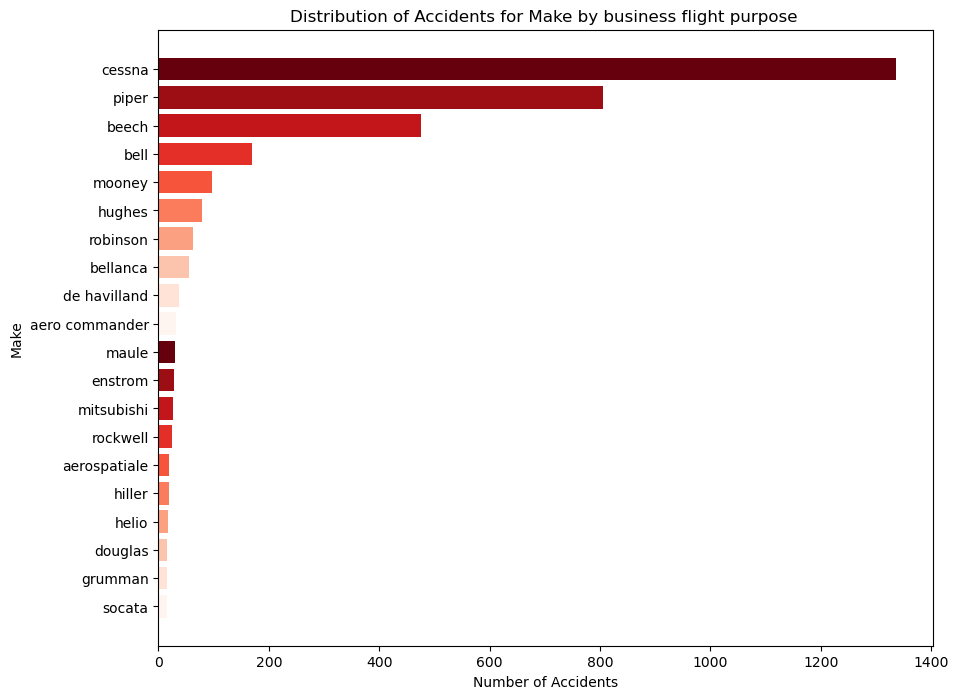

In [267]:
# plot the distribution of accidents for make and business flight purpose
# Determine what plane is good for business

fig, ax = plt.subplots(figsize=(10,8))

# Getting a smooth color blend from 'RdYlBu' colormap
colors = plt.cm.Reds(np.linspace(1, 0, len(mbsort['Make'][:10])))

ax.barh(mbsort['Make'][:20], mbsort['Count'][:20], color=colors )
ax.set_xlabel('Number of Accidents')
ax.set_ylabel('Make')
ax.set_title('Distribution of Accidents for Make by business flight purpose ');
ax.invert_yaxis()

Cessna , Piper and Beech  have the most number of accidents for business purpose.

Largely attributed by the fact that it has been involved in many accidents. 

In [151]:
# lets calculate the least in the business category
mbsort_least = mbusiness.sort_values(by='Count')
len(mbsort_least[mbsort_least['Count'] == 0])


6950

From the above Distinction we can see that alot of planes (6950) have 0 Accidents.  Hence it would be difficult to identify a specific plane to decide on

### Lets look at the Engine type that has had lowest accidents

In [270]:
df_new['Engine_Type'].value_counts()

Engine_Type
Reciprocating    65111
Turbo Shaft       2536
Turbo Prop        2142
Unknown           1367
Turbo Fan          434
Turbo Jet          260
Electric             9
NONE                 2
LR                   1
UNK                  1
Name: count, dtype: int64

UNK, NONE and Unknown are place holders for missing values. so i will just drop them.

In [271]:
df_new['Engine_Type'].isna().sum()

3210

In [272]:
# get columns that are not null
df_new = df_new[df_new['Engine_Type'].notna()]

In [273]:
# Remove placeholder for missing values
df_new = df_new[~df_new['Engine_Type'].isin(['UNK', 'NONE', 'Unknown'])]

In [274]:
eng_accidents = df_new.groupby(['Engine_Type', 'Investigation_Type', 'Flight_Purpose']).size().reset_index(name='Count')
# sort by accident
eng_accidents = eng_accidents[eng_accidents['Investigation_Type'] == 'Accident']
# sort by business flight purpose
eng_accidents = eng_accidents[eng_accidents['Flight_Purpose'].isin(['Business', 'Executive/corporate'])]

eng_accidents

,Engine_Type,Investigation_Type,Flight_Purpose,Count
0,Electric,Accident,Business,1
3,LR,Accident,Business,1
11,Reciprocating,Accident,Business,3085
12,Reciprocating,Accident,Executive/corporate,190
45,Turbo Fan,Accident,Business,69
46,Turbo Fan,Accident,Executive/corporate,90
68,Turbo Jet,Accident,Business,37
69,Turbo Jet,Accident,Executive/corporate,27
89,Turbo Prop,Accident,Business,227
90,Turbo Prop,Accident,Executive/corporate,93


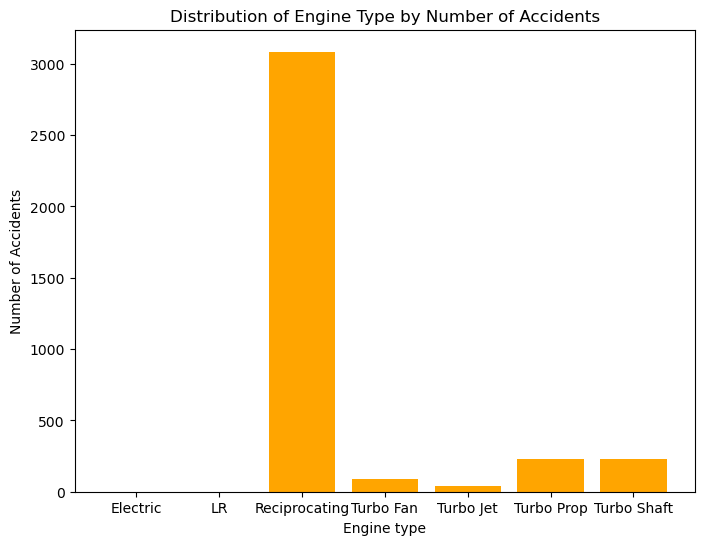

In [275]:
# plotting engine type and the number of accidents involved in 
fig, ax = plt.subplots(figsize=(8,6))

ax.bar(eng_accidents['Engine_Type'], eng_accidents['Count'], color = "orange")
ax.set_xlabel('Engine type')
ax.set_ylabel('Number of Accidents')
ax.set_title('Distribution of Engine Type by Number of Accidents');

Reciprocating engines are generally used for small aircrafts. Hence mostly used in CESSNA and Piper. This explains the high number of accidents

Turbo fan engines are used for commercial planes e.g Boeing 747, Boing 767. It is a good engine type to purchase. 
Turbo Jet engines offer high thrust and performance at high speeds, making them ideal for military and supersonic applications. 

For electric and LR engine, they are less common and have less data. 

Turbo jet and Turbo fan engines seem to be the best engine categories. 

**Turbo jet** being the best for business purpose

### Lets investigate distribution of accidents yearly by Make

In [245]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70493 entries, 0 to 88767
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Investigation_Type  70493 non-null  object        
 1   Event_Date          70493 non-null  datetime64[ns]
 2   Country             70379 non-null  object        
 3   Injury_Severity     70481 non-null  object        
 4   Aircraft_damage     70493 non-null  object        
 5   Make                70493 non-null  object        
 6   Model               70493 non-null  object        
 7   Amateur.Built       70477 non-null  object        
 8   Number_of_Engines   69963 non-null  float64       
 9   Engine_Type         70493 non-null  object        
 10  Flight_Purpose      70493 non-null  object        
 11  Fatal_Injuries      61194 non-null  float64       
 12  Serious_Injuries    60326 non-null  float64       
 13  Minor_Injuries      61051 non-null  float64       


In [262]:
df_new['Event_Date']

0        1948
1        1962
2        1974
3        1977
6        1981
         ... 
88639    2022
88647    2022
88661    2022
88735    2022
88767    2022
Name: Event_Date, Length: 70493, dtype: int64

In [ ]:
# convert event date to year

df_new['Event_Date'] = df_new['Event_Date'].map(lambda x: x.year)
df_new

In [275]:
df_new['Event_Date'].isna().sum()
df_new['Event_Date'].unique()

array([1948, 1962, 1974, 1977, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
       1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
       2021, 2022], dtype=int64)

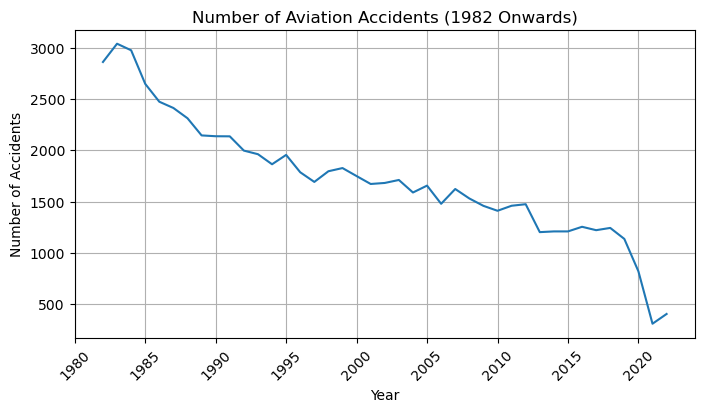

In [350]:

df_new = df_new[df_new['Event_Date'] >= 1982]

accidents_by_year = df_new['Event_Date'].value_counts().sort_index()

plt.figure(figsize=(8, 4))
plt.plot(accidents_by_year.index, accidents_by_year.values, linestyle='-')
plt.title('Number of Aviation Accidents (1982 Onwards)')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

There's a dramatic decrease of accidents across the years.

## Implementing the Solution

**The Aircraft at Lowest Risk**
-----
#### The following attributes contribute highly in determining the aircraft with lowest risk.
- engine type should be turbo Jet
- flight purpose -(Business, Executive/corporate )
- investigation type -(Accident)
- Aircraft_damage - (Minor)
  

In [375]:
# group by the attributes above 
low_risk = df_new.groupby(['Make','Model', 'Investigation_Type', 'Event_Date', 'Flight_Purpose', 'Engine_Type' ,'Aircraft_damage']).size().reset_index(name='count')

# filter rows to get accident only
low_risk  = low_risk [low_risk ['Investigation_Type'] == 'Accident']

# filter rows to get past 10 years
low_risk  = low_risk [low_risk ['Event_Date'].map(lambda x: x in range(2017,2022))]

# filter by Business flight purpose 
low_risk  = low_risk [low_risk ['Flight_Purpose'].isin(['Business', 'Executive/corporate'])]

# filter by engine type turbo jet and turbo fan
low_risk  = low_risk [low_risk ['Engine_Type'].isin(['Turbo Jet'])]

# sort by count
low_risk  = low_risk .sort_values(by='count', ascending=False)
low_risk 

,Make,Model,Investigation_Type,Event_Date,Flight_Purpose,Engine_Type,Aircraft_damage,count
17925,cessna,550,Accident,2018,Business,Turbo Jet,Substantial,1
17950,cessna,560,Accident,2019,Business,Turbo Jet,Minor,1
26366,honda aircraft,HA-420,Accident,2019,Executive/corporate,Turbo Jet,Substantial,1
28204,learjet inc,31,Accident,2018,Business,Turbo Jet,Substantial,1
31436,northrop,F5,Accident,2020,Business,Turbo Jet,Substantial,1


We are remaining with 5 planes to decide from. 


In [370]:
# I added aircraft damage to see whether i would get an edge. 

#filter by aircraft damange
low_risk  = low_risk [low_risk ['Aircraft_damage'] == 'Minor']
Best_aircraft =  low_risk['Make'] +' '+ low_risk['Model']
Best_aircraft

17950    cessna 560
dtype: object

### **Cessna 560** is the lowest risk Aircraft